In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1)

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

sns.set_palette("Spectral")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [17]:
from FizNet import NN

Cost after iteration 0: 3.028518363981292
Cost after iteration 100: 0.10201545793069361
Cost after iteration 200: 0.04356266333699974
Cost after iteration 300: 0.02524036651759316
Cost after iteration 400: 0.016971702960838955
Cost after iteration 500: 0.012427612991706548
Cost after iteration 600: 0.009617362355479707
Cost after iteration 700: 0.007755313329008723
Cost after iteration 800: 0.006452357718734329
Cost after iteration 900: 0.005492901017097884
Cost after iteration 1000: 0.004762334701667268
Cost after iteration 1100: 0.0041901770861804185
Cost after iteration 1200: 0.0037307153179721637
Cost after iteration 1300: 0.003353496746392361
Cost after iteration 1400: 0.003039960752057011
Cost after iteration 1500: 0.0027758081561685363
Cost after iteration 1600: 0.0025501948142829622
Cost after iteration 1700: 0.002355747609867135
Cost after iteration 1800: 0.002186745381800864
Cost after iteration 1900: 0.0020385406332979
Cost after iteration 2000: 0.0019074058177466554
Cost af

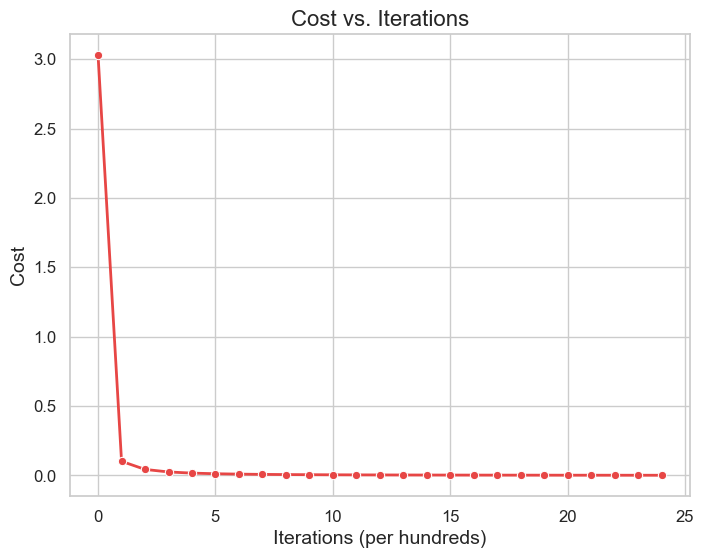

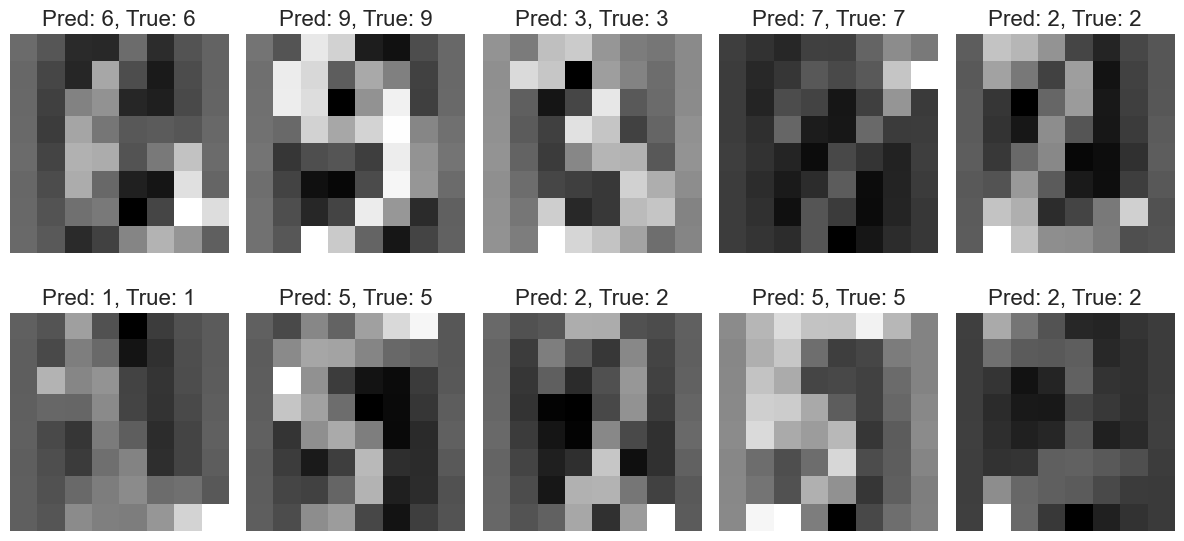

In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to (n_features, n_samples) as required by our NN
X_train = X_train.T
X_test = X_test.T

# One-hot encode the labels
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y].T

y_train_one_hot = one_hot_encode(y_train, 10)
y_test_one_hot = one_hot_encode(y_test, 10)

# Create and train the neural network
input_size = X_train.shape[0]
hidden_layer1_size = 128
hidden_layer2_size = 64
num_classes = 10

layer_dims = [input_size, hidden_layer1_size, hidden_layer2_size, num_classes]
nn = NN(layer_dims)

# Train the model
costs = nn.train(X_train, y_train_one_hot, num_iterations=2500, learning_rate=0.100000000001, print_cost=True)

# Make predictions
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, test_predictions))

# Plot the cost over iterations
plt.figure(figsize=(8, 6))
sns.lineplot(data=costs, marker='o', color='#e74645', linewidth=2)
plt.title('Cost vs. Iterations')
plt.xlabel('Iterations (per hundreds)')
plt.ylabel('Cost')
plt.show()

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[:, i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {test_predictions[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()